In [ ]:
include("../code/rsb.jl")
using OffsetArrays, Random, StatsBase, ProgressMeter
ProgressMeter.ijulia_behavior(:clear);

In [15]:
K = OffsetArray([0,0,1],1:3)
mK = sum(k*K[k] for k=eachindex(K))

popsize=5*10^5
maxiter=10^3
samples=10^8

J=20;

# Find optimal $y$ for a given rate 

In [16]:
f1=0

R=0.25
f3 = 1 + f1 - 3 * R
f2 = 1 - f1 - f3
Λ = OffsetArray([f1,f2,f3],1:3)

R, f3, f2

(0.25, 0.25, 0.75)

In [ ]:
ys_R25 = 0.5:0.1:1.3
Ds_R25=fill(NaN, eachindex(ys_R25)) # minimal dist (should be above Shannon)
Fs_R25=fill(NaN, eachindex(ys_R25)) # free energy (should be maximized over y)
Σs_R25=fill(NaN, eachindex(ys_R25)) # complexity (should be positive)
Ds_er_R25=fill(NaN, eachindex(ys_R25))
Fs_er_R25=fill(NaN, eachindex(ys_R25))
Σs_er_R25=fill(NaN, eachindex(ys_R25))
avgpopPs_R25 = fill(NaN, -J:J, eachindex(ys_R25)) #averaged P(h) (shouldn't have weight in J)

for (i,y) in pairs(ys_R25)
    @show i,y
    popP = fill(0.0, -J:J, 1:popsize); popP[-1:1,:].=1/3
    popQ = fill(0.0, -J:J, 1:popsize); popQ[-1:1,:].=1/3

    popP, popQ = RSB(Λ,K; J=J, maxiter=maxiter, popsize=popsize, popP=popP, popQ=popQ, y=y)
    Favg, Oavg, Σavg, Fstd, Ostd, Σstd = overlap1RSB_errorbars(Λ,K; popP=popP,popQ=popQ,y=y,samples=samples)

    Davg=0.5*(1.0-Oavg)
    Dstd=Ostd*0.5
    avgPop = mean(popP, dims=2)
    println(R, " ", y, " ", Davg, " ", Favg, " ", Σavg)  

    Ds_R25[i],Fs_R25[i], Σs_R25[i] = Davg, Favg, Σavg
    Ds_er_R25[i],Fs_er_R25[i], Σs_er_R25[i] = Dstd, Fstd, Σstd
    avgpopPs_R25[-J:J,i]= avgPop[:,1]
end        


┌ Warning: ProgressMeter by default refresh meters with additional information in IJulia via `IJulia.clear_output`, which clears all outputs in the cell. 
│  - To prevent this behaviour, do `ProgressMeter.ijulia_behavior(:append)`. 
│  - To disable this warning message, do `ProgressMeter.ijulia_behavior(:clear)`.
└ @ ProgressMeter /home/crotti/.julia/packages/ProgressMeter/Vf8un/src/ProgressMeter.jl:620
Progress:   6%|██▎                                      |  ETA: 0:52:32
  F:  -0.5356826498117021
  O:  0.5327316616852452
  D:  0.2336341691573774

In [457]:
#find Shannon bound
range = 0.1:0.00001:0.5
m = maximum(findall(x-> x>0.25, H.(range)))
DShan_25 = range[m]
DShan_25, H(DShan_25)

(0.2145, 0.2500032674701567)

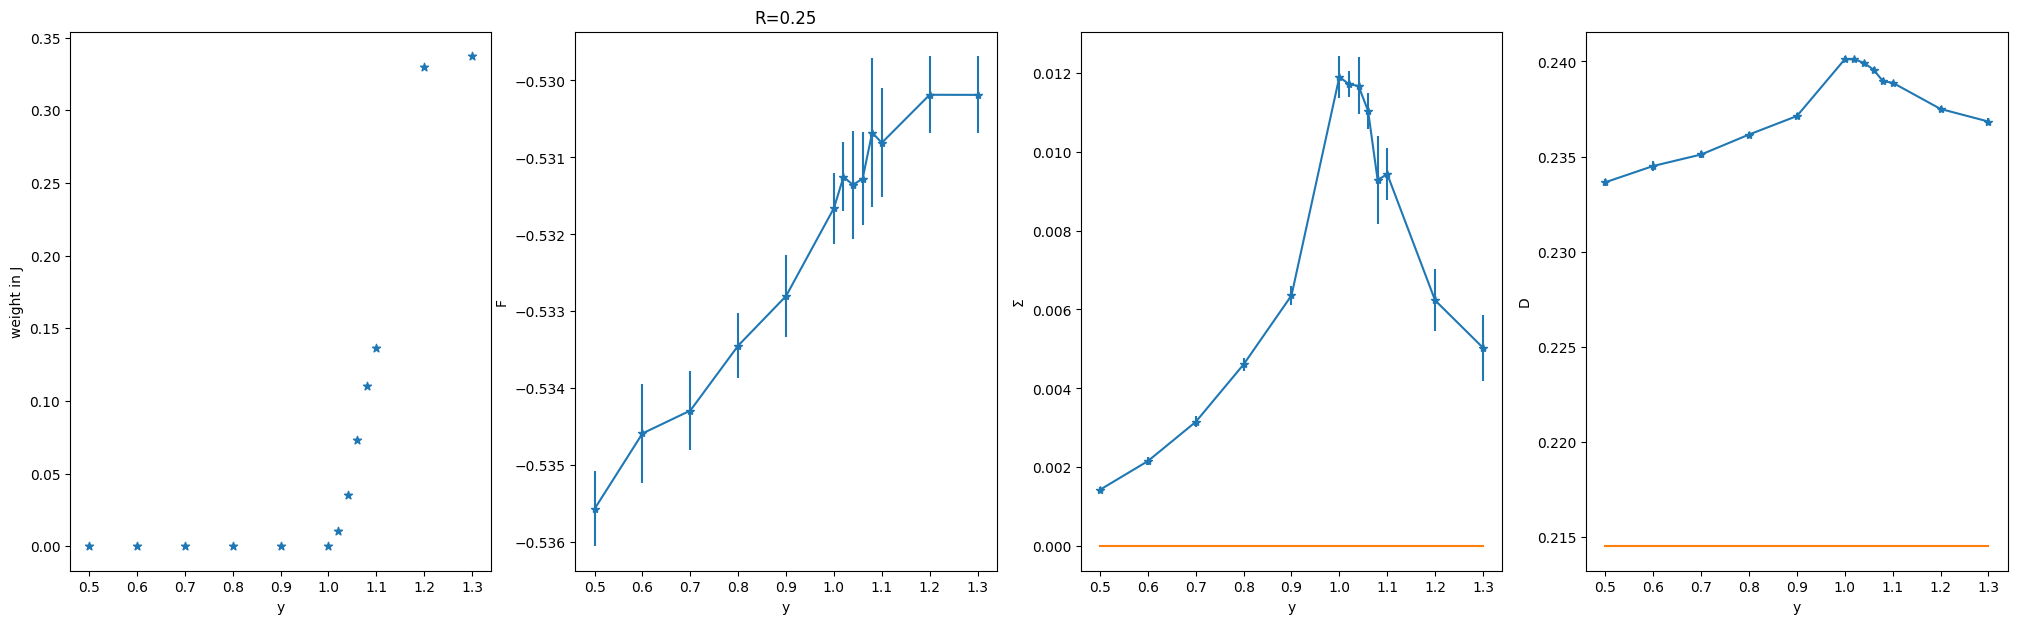

PyObject Text(1531.554347826087, 0.5, 'D')

In [980]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25,7))
ax2.set_title("R=0.25")
ax1.set_xlabel("y")
ax1.set_ylabel("weight in J")
ax1.scatter(ys_R25,avgpopPs_R25[J,:], marker="*")
ax2.errorbar(ys_R25,Fs_R25, yerr=Fs_er_R25, marker="*")
ax2.set_xlabel("y")
ax2.set_ylabel("F")
ax3.errorbar(ys_R25,Σs_R25, yerr=Σs_er_R25, marker="*")
ax3.plot(ys_R25,zero(ys_R25))
ax3.set_xlabel("y")
ax3.set_ylabel("Σ")
ax4.errorbar(ys_R25,Ds_R25, yerr=Ds_er_R25, marker="*")
ax4.plot((0.5,1.3), (DShan_25,DShan_25))
ax4.set_xlabel("y")
ax4.set_ylabel("D")


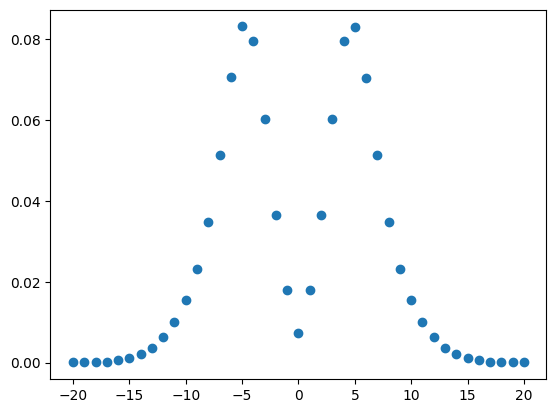

avgpopPs_R25[J, i] = 4.3833741620558806e-5


4.3833741620558806e-5

In [830]:
#plot weight in J
i=6
PyPlot.scatter(-J:J, avgpopPs_R25[-J:J,i])
@show avgpopPs_R25[J,i]

In [831]:
ys_R25[i], Ds_R25[i], Ds_er_R25[i]

(1.0, 0.24011787600556012, 0.000159658045833383)

In [1008]:
using DelimitedFiles
yopt_R25 = (ys_R25, Ds_R25, Ds_er_R25, Fs_R25, Fs_er_R25, Σs_R25, Σs_er_R25, avgpopPs_R25[J,:])
open("yopt_R25.txt", "w") do io
           writedlm(io, yopt_R25)
end

# Plot at $y_{\rm opt}$

In [977]:
R_yopt = [0.3125, 0.25, 0.24, 0.22, 0.21, 0.20, 0.1875, 0.17, 0.15, 0.125]
y_opt = [1.9, ys_R25[6], ys_R24[9], ys_R22[10], ys_R21[6], ys_R20[10], ys_R1875[6], ys_R17[7], ys_R15[6], ys_R125[8]]
D_opt = [0.21536241291881908, Ds_R25[6], Ds_R24[9], Ds_R22[10], Ds_R21[6], Ds_R20[10], Ds_R1875[6], Ds_R17[7], Ds_R15[6], Ds_R125[8]]
D_er_opt = [0.0002877389327970789, Ds_er_R25[6], Ds_er_R24[9], Ds_er_R22[10], Ds_er_R21[6], Ds_er_R20[10], Ds_er_R1875[6], Ds_er_R17[7], Ds_er_R15[6], Ds_er_R125[8]]
yopt_data = [R_yopt, y_opt, D_opt, D_er_opt]

4-element Vector{Vector{Float64}}:
 [0.3125, 0.25, 0.24, 0.22, 0.21, 0.2, 0.1875, 0.17, 0.15, 0.125]
 [1.9, 1.0, 0.86, 0.69, 0.625, 0.575, 0.52, 0.46, 0.402, 0.343]
 [0.21536241291881908, 0.24011787600556012, 0.2442318305453951, 0.25372783563063495, 0.2585018634864866, 0.2642820806995148, 0.2704554274324484, 0.28258647921866076, 0.2944686168946924, 0.3028547039989761]
 [0.0002877389327970789, 0.000159658045833383, 0.00013760446468317518, 0.00012897708280611386, 0.00011284340629918102, 8.629505150632892e-5, 0.00011236805121569879, 0.00010967473848975396, 0.00013760737710714796, 6.9119982229565e-5]

In [978]:
using DelimitedFiles
open("yopt_data.txt", "w") do io
           writedlm(io, yopt_data)
end

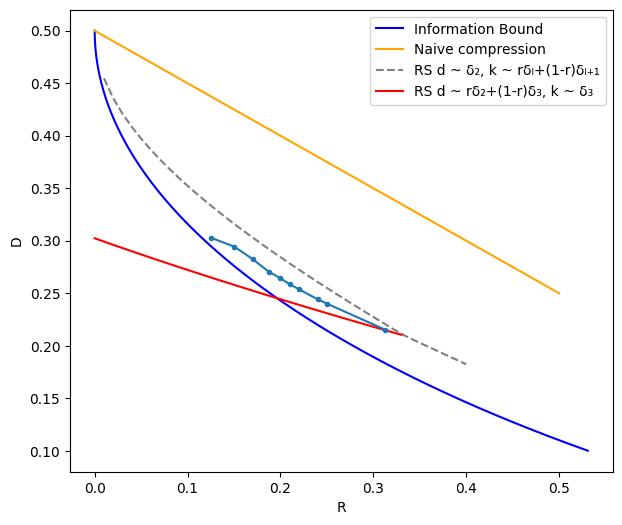

PyObject <matplotlib.legend.Legend object at 0x7fbf76482320>

In [979]:
using PyPlot
H(p)=1+p*log2(p)+(1-p)*log2(1-p)
fig, ax = PyPlot.subplots(figsize=(7,6))
PyPlot.xlabel("R")
PyPlot.ylabel("D")
PyPlot.plot(H.(0.1:0.001:0.5), 0.1:0.001:0.5, label="Information Bound", color="blue")
PyPlot.plot((0,0.5),(0.5,0.25), label="Naive compression", color="orange")
PyPlot.plot(Rm[1:40],Dm[1:40], "--", label="RS d ~ δ₂, k ~ rδₗ+(1-r)δₗ₊₁", c=:gray)
#PyPlot.plot(R12,D12, "-", label="RS d ~ rδ₁+(1-r)δ₂, k ~ δ₃", color="green")
PyPlot.plot(R23,D23, "-", label="RS d ~ rδ₂+(1-r)δ₃, k ~ δ₃", color="red") 
PyPlot.errorbar(R_yopt, D_opt, yerr=D_er_opt, marker=".")
PyPlot.legend()
#PyPlot.savefig("rs_energetic.pdf", dpi=300)